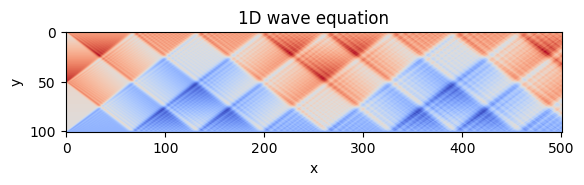

In [9]:
import numpy as np
import matplotlib.pyplot as plt

Nx, Nt, L, T = 100, 500, 1, 2
t = np.linspace(0, T, num=Nt+1, dtype=float)
x = np.linspace(0, L, num=Nx+1, dtype=float)
c = 1.94
dx = x[1] - x[0]
dt = t[1] - t[0]
r = (c*dt/dx)**2
assert r < 1

u = np.empty((Nx+1, Nt+1), dtype=float)
u[:, 0] = np.where(x <= 0.5, 2*x, 0.2*(1-x))  # Updated initial condition
assert u[0, 0] == 0 and u[Nx, 0] == 0

u[0, :] = 0.5  # Updated left boundary condition
u[Nx, :] = -0.5  # Updated right boundary condition

u[1:-1, 1] = u[1:-1, 0] + 0.5*r*(u[:-2, 0] - 2*u[1:-1, 0] + u[2:, 0])
for a in range(1, Nt):
    for b in range(1, Nx):
        u[b, a+1] = -u[b, a-1] + 2*u[b, a] + r*(u[b-1, a] - 2*u[b, a] + u[b+1, a])

plt.title('1D wave equation')
plt.xlabel("x")
plt.ylabel("y")
plt.imshow(u, cmap='coolwarm', interpolation='hamming')
plt.show()
